## INTRODUCTION

This is the final group project: **PROJECT 3 - CLUSTERING** of course `Data Mining and Its Applications`

In this project, we used dataset from `Kaggle`: **Mall Customer Segmentation Data** (source below).\
`Acknowledgements`: From Udemy's Machine Learning A-Z course.

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## GROUP MEMBERS

| Fullname  | Student ID | Task                                    | Rate of Div.Work | Completion |
|-----------|------------|-----------------------------------------|------------------|------------|
| Lu The Vy | 19127009   | Report introduction, data processing, discovering, preparing |50%|100%|
| Mac Van Hung |19127416 | Clustering models, report result, conclusions|50%|100%            |
|           |            |                                         |                  |            |

----

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

## DATA PREPARING & DISCOVERING

### Read dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv',',')
print("First 10 row of dataset: ")
df.head(10)

First 10 row of dataset: 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Dataset size

In [3]:
print("Number of row: ",df.shape[0])
print("Number of column: ",df.shape[1])

Number of row:  200
Number of column:  5


### Content

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

- **CustomerID**: ID of each customer by number
- **Gender**: Male or Female
- **Age**: Age of each customer
- **Annual Income**: Customer income (unit: $)
- **Spending Score**: Customer score in membership card, range from 1 to 100

### Data type

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Check if any column is unusual?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


=> **Nothing is unusual**

### Check if any row is unusual?

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

=> **Nothing is unusual**

### Check if any row is duplicated?

In [8]:
print("Number of duplicated row: ", df.duplicated().sum())

Number of duplicated row:  0


### Data distribution

#### Numeric

In [9]:
def missing_ratio(col):
    return col.isna().mean() * 100

def first_quartile(col):
    return col.quantile(0.25)

def third_quartile(col):
    return col.quantile(0.75)

In [12]:
num_col_profiles_df = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
num_col_profiles_df = num_col_profiles_df.agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.mean,
                                               first_quartile, pd.Series.median, third_quartile])
num_col_profiles_df.round(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
missing_ratio,0.00,0.00,0.00,0.00
min,1.00,18.00,15.00,1.00
max,200.00,70.00,137.00,99.00
mean,100.50,38.85,60.56,50.20
first_quartile,50.75,28.75,41.50,34.75
median,100.50,36.00,61.50,50.00
third_quartile,150.25,49.00,78.00,73.00


##### We use data binning technique to divide `Age` column into multiple bins and use pie chart to visualize its distribution

In [20]:
df_age = pd.DataFrame(df['Age'])

In [31]:
df_age['Bins'] = pd.qcut(df['Age'], q=4)

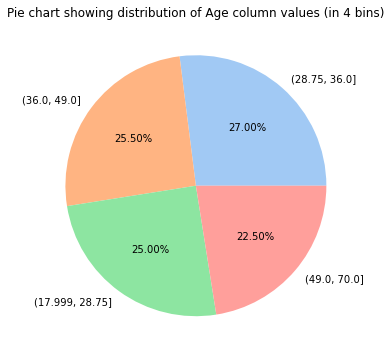

In [36]:
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:14]
plt.title('Pie chart showing distribution of Age column values (in 4 bins)')
plt.pie(df_age['Bins'].value_counts().values,labels=df_age['Bins'].value_counts().index,colors=colors,autopct='%.2f%%');

=> **The difference between size of each bin is not much**

#### Categorical

In [13]:
cat_col_profiles_df = df[['Gender']]
cat_col_profiles_df = cat_col_profiles_df.agg([missing_ratio, pd.Series.unique, pd.Series.nunique])
cat_col_profiles_df

,Gender
missing_ratio,0.0
unique,"[Male, Female]"
nunique,2


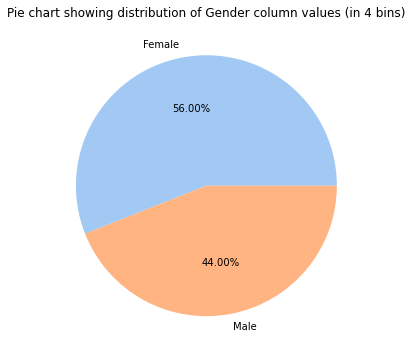

In [38]:
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:14]
plt.title('Pie chart showing distribution of Gender column values (in 4 bins)')
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,colors=colors,autopct='%.2f%%');

----

## DATA PREPROCESSING

### Data selection

- Apply data binning technique for `Gender` column

In [9]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


=> Value `Male/Female` (object) to `1/0` (int64)

- Drop `CustomerID` column because it doesn't seem to make too much sense in the clustering process

In [10]:
df.drop('CustomerID',axis=1,inplace=True)
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


----